In [ ]:
import sys

print("Установка пакетов для текущей версии python: ", sys.version)
!{sys.executable} -m pip install noisereduce

Говорите!
<class 'list'> <class '_cffi_backend.buffer'>
<class 'bytes'> <class 'int'>


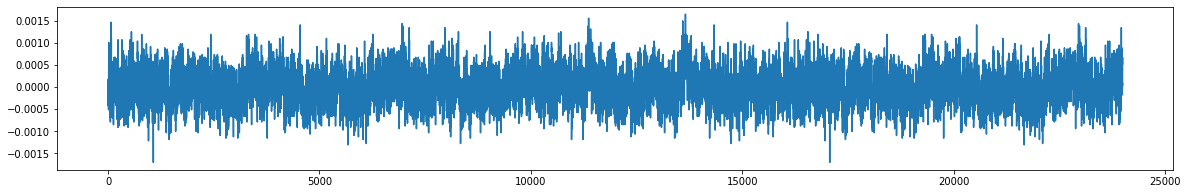

In [8]:
import vosk
import sys
import sounddevice as sd
import soundfile as sf
import wave
import queue
import io
import json
from time import time as now
import matplotlib.pyplot as plt
%matplotlib inline

model = vosk.Model("model_small")
samplerate = 16000
device = 1

q = queue.Queue()
data = []

def callback(voice_text: str):
    print(voice_text)

def q_callback(in_data, frames, time, status):
    if status:
        print(frames, time, status, file=sys.stderr)
    data_bytes = bytes(in_data)
    data.append(in_data)
    q.put(data_bytes)

def va_listen():
    print("Говорите!")
    with sd.RawInputStream(samplerate=samplerate, blocksize=8000, device=device, dtype='int16',
                           channels=1, callback=q_callback):
        rec = vosk.KaldiRecognizer(model, samplerate)
        start_time = now()  # in seconds
        while (now() - start_time) < 1:
            data_bytes = q.get()
            if rec.AcceptWaveform(data_bytes):
                callback(json.loads(rec.Result())["text"])
            # else:
            #    print(rec.PartialResult())

va_listen()

def normalize_file(the_data):
    print(type(the_data), type(the_data[0]))
    one_data = b"".join(the_data) # Collect raw audio data
    print(type(one_data), type(one_data[0]))

    # Convert to a PCM WAV file with headers
    file = io.BytesIO()
    with wave.open(file, mode='wb') as w:
        w.setnchannels(1)
        w.setsampwidth(2)
        w.setframerate(samplerate)
        w.writeframes(one_data)
    file.seek(0)
    return file

my_file = normalize_file(data)
data, rate = sf.read(my_file)

_, ax = plt.subplots(figsize=(20,3))
ax.plot(data)

<class 'numpy.ndarray'> <class 'numpy.float64'>
(200542,)


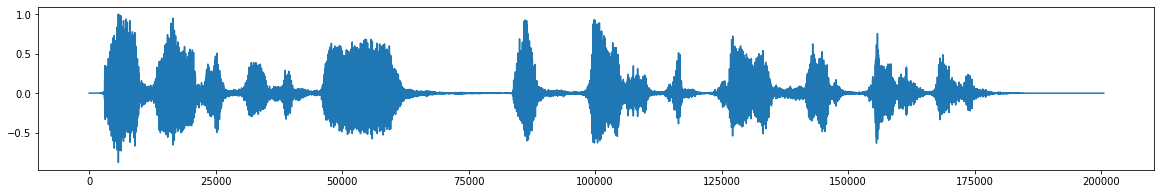

In [9]:
import soundfile as sf
import urllib.request
import io
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://raw.githubusercontent.com/timsainb/noisereduce/master/assets/fish.wav"
response = urllib.request.urlopen(url)
data, rate = sf.read(io.BytesIO(response.read()))
print(type(data), type(data[0]))
print(data.shape)

_, ax = plt.subplots(figsize=(20,3))
ax.plot(data)